In [1]:
import os
import openai
openai.organization = "org-Fdxeuqkbxtds3P3phP6QCXpq"
openai.api_key = "INSERT OWN API KEY"
completion = openai.ChatCompletion()

In [4]:
def askgpt(question, chat_log=None):
    if chat_log is None:
        chat_log = [{
            'role': 'system',
            'content': 'You are a helpful, upbeat and funny assistant.',
        }]
    chat_log.append({'role': 'user', 'content': question})
    response = completion.create(model='gpt-3.5-turbo', messages=chat_log)
    answer = response.choices[0]['message']['content']
    chat_log.append({'role': 'assistant', 'content': answer})
    return answer, chat_log

In [19]:
answer, log = askgpt('Verstehst du Anfragen in Deutsch?')

In [20]:
answer

'Ja, ich verstehe Anfragen auf Deutsch und kann auf Deutsch antworten. Wie kann ich dir behilflich sein?'

In [9]:
import jsonlines
from sklearn.feature_extraction.text import TfidfVectorizer


# Hier legen wir fest, welche Daten (Wahlperiode 19 oder 20) wir laden:
legislatur = 20

# Wir generieren eine leere Liste:
alleReden = []

# Wir öffnen den entsprechende File (Dateipfad anpassen!):
with jsonlines.open(f'../../data/speeches_{legislatur}.jsonl') as f:
    for line in f.iter():
        # Wir packen alles Zeile für Zeile zu unserer Liste:
        alleReden.append(line)

# Wir sortieren nach Datum:
alleReden.sort(key=lambda x: x['date'])

# Wir lassen uns zeigen, wie viele Reden enthalten sind.
print(f'Die Liste enthält {len(alleReden)} Reden')
# Neue Zeile auf der Konsole:
print(f'\n')

Die Liste enthält 10791 Reden




In [16]:
reden_lauterbach = []
for rede in alleReden:
    if rede['name']=="Karl Lauterbach":
        reden_lauterbach.append(rede)

In [18]:
str(reden_lauterbach)

"[{'text': 'Frau Präsidentin, ich schwöre es, so wahr mir Gott helfe. Herzlichen Glückwunsch und alles Gute für Ihre Aufgabe! ', 'id': 'ID20501200', 'period': '18', 'date': '2021-12-08', 'name': 'Karl Lauterbach', 'party': 'SPD', 'redner_id': '11003797', 'discussion_title': 'Tagesordnungspunkt 5 2021-12-08'}, {'text': 'Frau Präsidentin! Meine sehr verehrten Damen und Herren! Die neue Bundesregierung ist kaum zwei Tage im Amt, und das erste Gesetz ihrer Amtszeit kommt bereits heute im Deutschen Bundestag zum Abschluss. Wir haben keine Zeit zu verlieren. Diese Bundesregierung hat sich viel vorgenommen. Aber das oberste Ziel – das oberste Ziel! – ist für uns der Schutz der Bevölkerung in dieser Gesundheitskrise. Wir werden daher alles tun, um diese Krise so schnell wie möglich zu beenden, und wir werden dafür auch eng mit den konstruktiv gewählten Teilen der Opposition zusammenarbeiten. Wir haben auch viele Vorschläge der Opposition aufgegriffen, für die ich mich an dieser Stelle herzlich

In [27]:
inhalt_reden = []

for rede in range(5):
    req = f"Fasse den Inhalt der folgenden Rede kurz und knapp auf Deutsch zusammen und benutze circa 5 Sätze: {reden_lauterbach[rede+1]}"
    answer, log = askgpt(req)
    inhalt_reden.append(answer)



In [28]:
inhalt_reden

['Karl Lauterbach hat im Deutschen Bundestag darüber gesprochen, dass die neue Bundesregierung alles tun wird, um die Gesundheitskrise so schnell wie möglich zu beenden und den Schutz der Bevölkerung zu gewährleisten. Es wird daran gearbeitet, die Delta-Welle nachhaltig zu brechen und die drohende Omikron-Welle zu verhindern. Dazu wird das Infektionsschutzgesetz verbessert und den Ländern alle notwendigen Instrumente zur Kontrolle des Infektionsgeschehens gegeben. Es soll auch eine einrichtungsbezogene Impfpflicht geben. Lauterbach betonte, dass alle zusammenarbeiten müssen, um diesen Zielen näher zu kommen.',
 'Karl Lauterbach spricht als Teil einer Debatte im deutschen Parlament über die andauernde COVID-19-Pandemie. Er betont, dass das kommende Jahr entscheidend sein könnte, um das Virus zu einer endemischen Krankheit zu machen, die weniger tödlich und weniger bedrohlich ist. Die Regierung ergreift alle notwendigen Maßnahmen, um dies zu erreichen und den Erfolg im Umgang mit der Omi

In [29]:
req_final = f"Erstelle ein semantisches Netzwerk aus den folgenden Zusammenfassungen von Karl Lauterbach. Die Knoten sollen je eine Zusammenfassung sein, und je ähnlicher sich zwei Zusammenfassungen inhaltlich sind, desto höher ist das Gewicht der Kante zwischen den beiden Reden. Gebe das entstehende Netzwerk mit einer Distanzmatrix zurück. Die Reden sind folgende: {str(inhalt_reden)}"

In [30]:
answer, log = askgpt(req_final)

In [32]:
answer, log = askgpt("In Pyhton.", log)

In [33]:
answer

"Klar, dafür nutzen wir das Natural Language Toolkit (NLTK) und scikit-learn. Zunächst müssen wir die benötigten Bibliotheken importieren und die Zusammenfassungen der Reden definieren:\n\n```\nimport nltk\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.metrics.pairwise import cosine_similarity\n\nnltk.download('punkt')\n\n# Zusammenfassungen definieren\nspeeches = [\n    'Karl Lauterbach hat im Deutschen Bundestag darüber gesprochen, dass die neue Bundesregierung alles tun wird, um die Gesundheitskrise so schnell wie möglich zu beenden und den Schutz der Bevölkerung zu gewährleisten. Es wird daran gearbeitet, die Delta-Welle nachhaltig zu brechen und die drohende Omikron-Welle zu verhindern. Dazu wird das Infektionsschutzgesetz verbessert und den Ländern alle notwendigen Instrumente zur Kontrolle des Infektionsgeschehens gegeben. Es soll auch eine einrichtungsbezogene Impfpflicht geben. Lauterbach betonte, dass alle zusammenarbeiten müssen, um diesen Zielen 

In [37]:
import numpy as np
d = np.array([[0.0, 0.2559473, 0.36980436, 0.40082381, 0.40722843],
    [0.2559473, 0.0, 0.29272087, 0.38864452, 0.25023498],
    [0.36980436, 0.29272087, 0.0, 0.3431317, 0.51027725],
    [0.40082381, 0.38864452, 0.3431317, 0.0, 0.37982468],
    [0.40722843, 0.25023498, 0.51027725, 0.37982468, 0.0]])

In [38]:
import networkx as nx

In [40]:
G = nx.from_numpy_matrix(d)

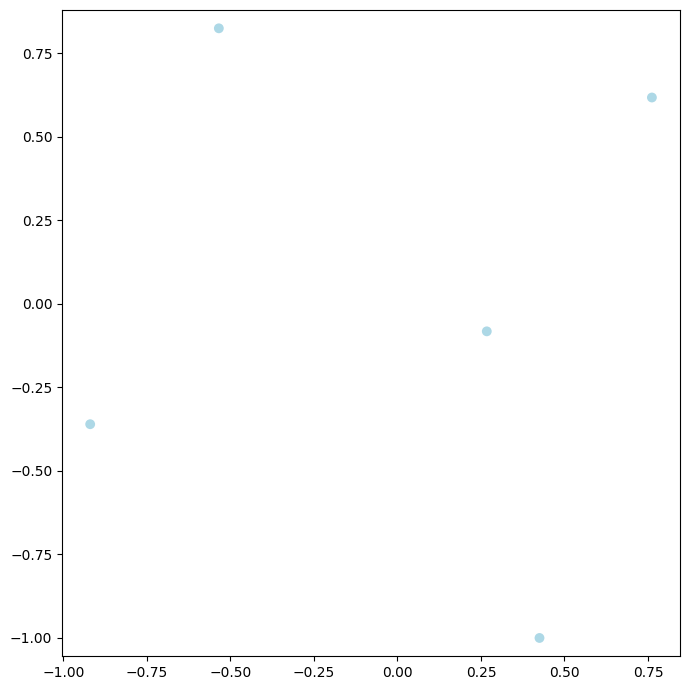

In [41]:
pos = nx.kamada_kawai_layout(G)
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
for p in pos.values():
    plt.scatter(p[0], p[1], c = 'lightblue', marker='o', s=50, edgecolor='None')
plt.tight_layout()
plt.axis('equal')
plt.show()